Part 1
Question 2:

Question 1:
1. The analysis is quite sensitive to outlier and the size of the smallest group must be larger than the number of predictor variables.

Multivariate normality: Independant normal variables.

Inpependence: Participants are assumed to be randomly sampled.

2. Observation of each class is drawn from a normal distribution.

Assumes each class has it's own covariance matrix.

3. Assumes a certain distance evaluation has been chosen (euclidian, manhattan, etc.) That the k chosen is smaller than the smallest class. (This I wrote on my own, not sure if there is more to this).

4. CART does not seem to have any initial assumptions.

Question 2:

In [21]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score, cross_validate
from copy import deepcopy
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, balanced_accuracy_score, accuracy_score, top_k_accuracy_score
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import zero_one_loss, f1_score, roc_auc_score

C:\Users\anton\AppData\Local\Temp/ipykernel_21568/2059716354.py:3: RuntimeWarning: covariance is not positive-semidefinite.
  X2 = np.random.multivariate_normal(mean=[1, 1], cov=covariance_1, size=(800))
C:\Users\anton\AppData\Local\Temp/ipykernel_21568/2059716354.py:37: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contour(xx, yy, zz_qda, [0.5], linewidths=2., colors='k', label='QDA')


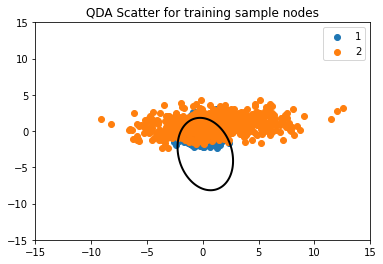

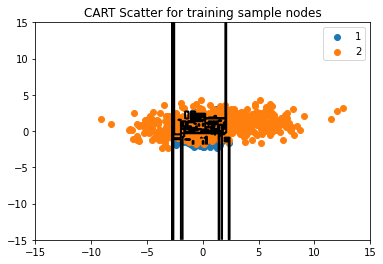

In [2]:
X1 = np.random.standard_normal((2, 800))
covariance_1 = [[10, 1],[-2, 1]]
X2 = np.random.multivariate_normal(mean=[1, 1], cov=covariance_1, size=(800))
X2 = np.transpose(X2)

train_X1 = X1[:, :720]
test_X1 = X1[:, 720:]
train_X2 = X2[:, :720]
test_X2 = X2[:, 720:]

X_0_train = np.vstack((train_X1[0,:], train_X2[0,:])).flatten()
X_1_train = np.vstack((train_X1[1,:], train_X2[1,:])).flatten()
X_train = np.zeros((1440, 3))
X_train[:, 0] = X_0_train
X_train[:, 1] = X_1_train
X_train[:720, 2] = 1
X_train[720:, 2] = 2 
X_0_train = np.vstack((test_X1[0,:], test_X2[0,:])).flatten()
X_1_train = np.vstack((test_X1[1,:], test_X2[1,:])).flatten()
X_test = np.zeros((160, 3))
X_test[:, 0] = X_0_train
X_test[:, 1] = X_1_train
X_test[:80, 2] = 1
X_test[80:, 2] = 2 
np.random.shuffle(X_test)
np.random.shuffle(X_train)

model = QuadraticDiscriminantAnalysis(store_covariance=True)
model2 = DecisionTreeClassifier()
model.fit(X_train[:, :2], X_train[:, 2:].ravel())
model2.fit(X_train[:, :2], X_train[:, 2:].ravel())

# Create the line
xx, yy = np.meshgrid(np.linspace(-15, 15, 400), np.linspace(-15, 15, 400))
X_grid = np.c_[xx.ravel(), yy.ravel()]
zz_qda = model.predict_proba(X_grid)[:,1].reshape(xx.shape)
plt.contour(xx, yy, zz_qda, [0.5], linewidths=2., colors='k', label='QDA')

plt.scatter(train_X1[0], train_X1[1], label="1")
plt.scatter(train_X2[0], train_X2[1], label="2")
plt.legend()
plt.title('QDA Scatter for training sample nodes')
plt.show()

zz_cart = model2.predict_proba(X_grid)[:,1].reshape(xx.shape)
plt.contour(xx, yy, zz_cart, [0.5], linewidths=2., colors='k')
plt.scatter(train_X1[0], train_X1[1], label="1")
plt.scatter(train_X2[0], train_X2[1], label="2")
plt.legend()
plt.title('CART Scatter for training sample nodes')
plt.show()


QDA prediction correctness for test_values: 72.5%
CART prediction correctness for test_values: 68.125%


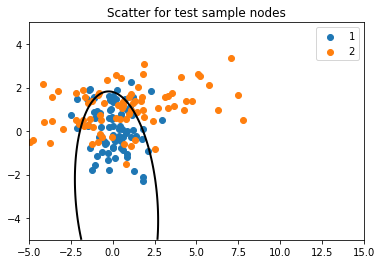

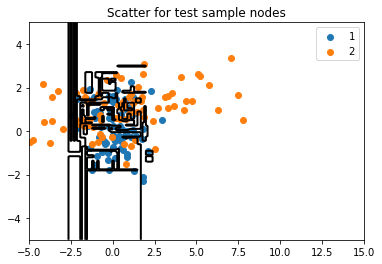

In [3]:

# Small prediction algo
checks_1 = 0
checks_2 = 0
for i in range(160):
    prediction = model.predict([X_test[i, :2]])
    prediction2 = model2.predict([X_test[i, :2]])
    if prediction == X_test[i, 2:]:
        checks_1 += 1
    if prediction2 == X_test[i, 2:]:
        checks_2 += 1
print(f'QDA prediction correctness for test_values: {checks_1/160*100}%')
print(f'CART prediction correctness for test_values: {checks_2/160*100}%')


plt.scatter(test_X1[0], test_X1[1], label="1")
plt.scatter(test_X2[0], test_X2[1], label="2")
xx, yy = np.meshgrid(np.linspace(-5, 15, 200), np.linspace(-5, 5, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
zz_qda = model.predict_proba(X_grid)[:,1].reshape(xx.shape)
plt.contour(xx, yy, zz_qda, [0.5], linewidths=2., colors='k')
plt.legend()
plt.title('Scatter for test sample nodes')
plt.show()


plt.scatter(test_X1[0], test_X1[1], label="1")
plt.scatter(test_X2[0], test_X2[1], label="2")
zz_qda = model2.predict_proba(X_grid)[:,1].reshape(xx.shape)
plt.contour(xx, yy, zz_qda, [0.5], linewidths=2., colors='k')
plt.legend()
plt.title('Scatter for test sample nodes')
plt.show()

Part 2 - CART

In [4]:
n_train_values = 800
n_train_values_part = int(n_train_values/4)
n_test_values = 200
n_test_values_part = int(n_test_values/4)
X_train = np.zeros((n_train_values, 3))
X_test = np.zeros((n_test_values, 3))


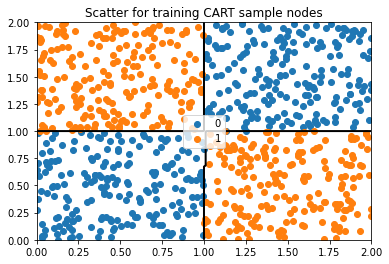

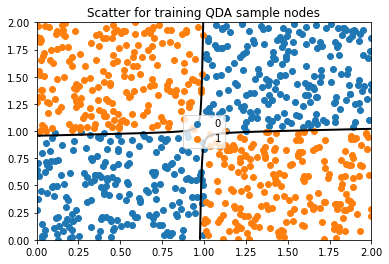

In [5]:
# Insert the different ranges

X_train[0:n_train_values_part, 0] = np.random.uniform(0, 1, size=n_train_values_part)
X_train[0:n_train_values_part, 1] = np.random.uniform(0, 1, size=n_train_values_part)
X_train[0:n_train_values_part, 2] = 0
X_test[0:n_test_values_part, 0] =    np.random.uniform(0, 1, size=n_test_values_part)
X_test[0:n_test_values_part, 1] =    np.random.uniform(0, 1, size=n_test_values_part)
X_test[0:n_test_values_part, 2] = 0
X_train[n_train_values_part:n_train_values_part*2, 0] = np.random.uniform(0, 1, size=n_train_values_part)
X_train[n_train_values_part:n_train_values_part*2, 1] = np.random.uniform(1, 2, size=n_train_values_part)
X_train[n_train_values_part:n_train_values_part*2, 2] = 1
X_test[n_test_values_part:n_test_values_part*2, 0] =    np.random.uniform(0, 1, size=n_test_values_part)
X_test[n_test_values_part:n_test_values_part*2, 1] =    np.random.uniform(1, 2, size=n_test_values_part)
X_test[n_test_values_part:n_test_values_part, 2] = 0
X_train[n_train_values_part*2:n_train_values_part*3, 0] = np.random.uniform(1, 2, size=n_train_values_part)
X_train[n_train_values_part*2:n_train_values_part*3, 1] = np.random.uniform(0, 1, size=n_train_values_part)
X_train[n_train_values_part*2:n_train_values_part*3, 2] = 1
X_test[n_test_values_part*2:n_test_values_part*3, 0] =    np.random.uniform(1, 2, size=n_test_values_part)
X_test[n_test_values_part*2:n_test_values_part*3, 1] =    np.random.uniform(0, 1, size=n_test_values_part)
X_test[n_test_values_part*2:n_test_values_part*3, 2] = 1
X_train[n_train_values_part*3:n_train_values_part*4, 0] = np.random.uniform(1, 2, size=n_train_values_part)
X_train[n_train_values_part*3:n_train_values_part*4, 1] = np.random.uniform(1, 2, size=n_train_values_part)
X_train[n_train_values_part*3:n_train_values_part*4, 2] = 0
X_test[n_test_values_part*3:n_test_values_part*4, 0] =    np.random.uniform(1, 2, size=n_test_values_part)
X_test[n_test_values_part*3:n_test_values_part*4, 1] =    np.random.uniform(1, 2, size=n_test_values_part)
X_test[n_test_values_part*3:n_test_values_part*4, 2] = 0
np.random.shuffle(X_train)
np.random.shuffle(X_test)

model = DecisionTreeClassifier()
model2 = QuadraticDiscriminantAnalysis()
model = model.fit(X_train[:, :2], X_train[:, 2:].ravel())
model2 = model2.fit(X_train[:, :2], X_train[:, 2:].ravel())

X_train_0 = np.array([row[:2] for row in X_train if row[2] == 0])
X_train_1 = np.array([row[:2] for row in X_train if row[2] == 1])
X_test_0 = np.array([row[:2] for row in X_train if row[2] == 0])
X_test_1 = np.array([row[:2] for row in X_train if row[2] == 1])

xx, yy = np.meshgrid(np.linspace(0, 2, 200), np.linspace(0, 2, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
zz_qda = model.predict_proba(X_grid)[:,1].reshape(xx.shape)
plt.contour(xx, yy, zz_qda, [0.5], linewidths=2., colors='k')
plt.scatter(X_train_0[:, 0], X_train_0[:, 1], label="0")
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label="1")

plt.legend()
plt.title('Scatter for training CART sample nodes')
plt.show()


xx, yy = np.meshgrid(np.linspace(0, 2, 200), np.linspace(0, 2, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
zz_qda = model2.predict_proba(X_grid)[:,1].reshape(xx.shape)
plt.contour(xx, yy, zz_qda, [0.5], linewidths=2., colors='k')
plt.scatter(X_train_0[:, 0], X_train_0[:, 1], label="0")
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label="1")

plt.legend()
plt.title('Scatter for training QDA sample nodes')
plt.show()




The prediction correctness for CART for test_values: 74.5%
The prediction correctness for QDA for test_values: 72.5%


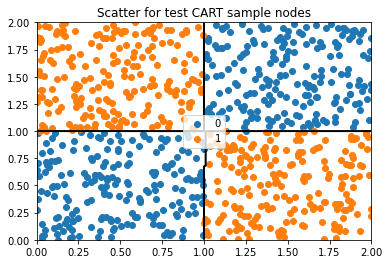

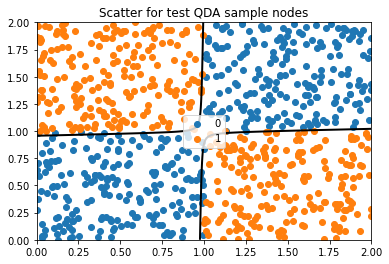

In [6]:
checks_1 = 0
checks_2 = 0
prediction = model.predict(X_test[:, :2])
prediction2 = model2.predict(X_test[:, :2])
for i in range(n_test_values):
    if prediction[i] == X_test[i, 2:]:
        checks_1 += 1
    if prediction2[i] == X_test[i, 2:]:
        checks_2 += 1

prediction_cart = model.predict(X_test[:, :2])
prediction_qda = model2.predict(X_test[:, :2])


print(f'The prediction correctness for CART for test_values: {checks_1/n_test_values*100}%')
print(f'The prediction correctness for QDA for test_values: {checks_2/n_test_values*100}%')

xx, yy = np.meshgrid(np.linspace(0, 2, 200), np.linspace(0, 2, 200))
X_grid = np.c_[xx.ravel(), yy.ravel()]
zz_cart = model.predict_proba(X_grid)[:,1].reshape(xx.shape)
zz_qda = model2.predict_proba(X_grid)[:,1].reshape(xx.shape)
plt.contour(xx, yy, zz_cart, [0.5], linewidths=2., colors='k')
plt.scatter(X_test_0[:, 0], X_test_0[:, 1], label="0")
plt.scatter(X_test_1[:, 0], X_test_1[:, 1], label="1")

plt.legend()
plt.title('Scatter for test CART sample nodes')
plt.show()

plt.contour(xx, yy, zz_qda, [0.5], linewidths=2., colors='k')
plt.scatter(X_test_0[:, 0], X_test_0[:, 1], label="0")
plt.scatter(X_test_1[:, 0], X_test_1[:, 1], label="1")

plt.legend()
plt.title('Scatter for test QDA sample nodes')
plt.show()


In [15]:
# Load UCI breast cancer dataset with column names and remove ID column
uci_bc_data = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data", 
    sep=",",
    header=None,
    names=[
        "id_number", "diagnosis", "radius_mean",
        "texture_mean", "perimeter_mean", "area_mean",
        "smoothness_mean", "compactness_mean",
        "concavity_mean","concave_points_mean",
        "symmetry_mean", "fractal_dimension_mean",
        "radius_se", "texture_se", "perimeter_se",
        "area_se", "smoothness_se", "compactness_se",
        "concavity_se", "concave_points_se",
        "symmetry_se", "fractal_dimension_se",
        "radius_worst", "texture_worst",
        "perimeter_worst", "area_worst",
        "smoothness_worst", "compactness_worst",
        "concavity_worst", "concave_points_worst",
        "symmetry_worst", "fractal_dimension_worst"
    ],).drop("id_number", axis=1)

uci_bc_data = uci_bc_data.sample(frac=1).reset_index(drop=True)
y = uci_bc_data.diagnosis.map({"B": 0, "M": 1}).to_numpy()
X = uci_bc_data.drop("diagnosis", axis=1).to_numpy()

In [8]:
print(f'number of Bs:{len(y[y==0])=}, number of Ms:{len(y[y==1])=}')
print(uci_bc_data)
print(f'The features seem to be numerical')
print(f'Some of them have the same scale, but some probably need to be scaled')

number of Bs:len(y[y==0])=357, number of Ms:len(y[y==1])=212
    diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0           M        19.02         24.59          122.00     1076.0   
1           B        10.71         20.39           69.50      344.9   
2           M        13.96         17.05           91.43      602.4   
3           M        14.25         21.72           93.63      633.0   
4           B        13.05         13.84           82.71      530.6   
..        ...          ...           ...             ...        ...   
564         M        19.17         24.80          132.40     1123.0   
565         M        27.42         26.27          186.90     2501.0   
566         B        11.93         10.91           76.14      442.7   
567         M        15.12         16.68           98.78      716.6   
568         B        13.85         17.21           88.44      588.7   

     smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0      

In [9]:
# Closer look at means and variance
for i in uci_bc_data:
    if i == 'diagnosis':
        continue
    mean_i = np.mean(uci_bc_data[i])
    var_i = np.var(uci_bc_data[i])
    print(f'{i}: mean={mean_i:.4f}, var={var_i:.4f}')

radius_mean: mean=14.1273, var=12.3971
texture_mean: mean=19.2896, var=18.4664
perimeter_mean: mean=91.9690, var=589.4028
area_mean: mean=654.8891, var=123625.9031
smoothness_mean: mean=0.0964, var=0.0002
compactness_mean: mean=0.1043, var=0.0028
concavity_mean: mean=0.0888, var=0.0063
concave_points_mean: mean=0.0489, var=0.0015
symmetry_mean: mean=0.1812, var=0.0008
fractal_dimension_mean: mean=0.0628, var=0.0000
radius_se: mean=0.4052, var=0.0768
texture_se: mean=1.2169, var=0.3038
perimeter_se: mean=2.8661, var=4.0807
area_se: mean=40.3371, var=2065.7946
smoothness_se: mean=0.0070, var=0.0000
compactness_se: mean=0.0255, var=0.0003
concavity_se: mean=0.0319, var=0.0009
concave_points_se: mean=0.0118, var=0.0000
symmetry_se: mean=0.0205, var=0.0001
fractal_dimension_se: mean=0.0038, var=0.0000
radius_worst: mean=16.2692, var=23.3192
texture_worst: mean=25.6772, var=37.7101
perimeter_worst: mean=107.2612, var=1127.1464
area_worst: mean=880.5831, var=323597.6709
smoothness_worst: mean

In [10]:
def accuracy(cm: np.array) -> float:
    tn, _, _, tp = cm.ravel()
    return (tp+tn)/sum(cm.ravel())

def sensitivity(cm: np.array) -> float:
    tn, _, _, tp = cm.ravel()
    return tp/(tp+tn)

def specificity(cm: np.array) -> float:
    tn, fp, _, _ = cm.ravel()
    return tn/(tn+fp)

def precision(cm: np.array) -> float:
    _, fp, _, tp = cm.ravel()
    return tp/(tp+fp)

def recall(cm: np.array) -> float:
    _, _, fn, tp = cm.ravel()
    return tp/(tp+fn)

def F_1_score(prec, rec) -> float:
    return 2*prec*rec/(prec+rec)

def MCC(cm) -> float:
    tn, fp, fn, tp = cm.ravel()
    return (tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))

fold_size=56, sum(sum(model_cms[x]))=56.0
for x='lda', acc=0.9589, sens=0.3445, spec=0.9944, prec=0.9893, rec=0.8981, f1_score=0.9415, mcc=0.9125


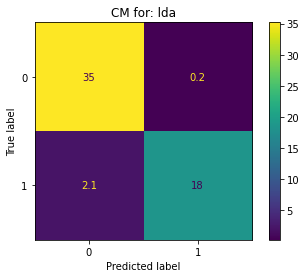

fold_size=56, sum(sum(model_cms[x]))=56.0
for x='qda', acc=0.9554, sens=0.3607, spec=0.9661, prec=0.9415, rec=0.9369, f1_score=0.9392, mcc=0.9039


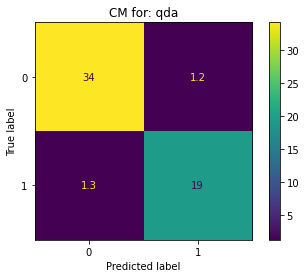

fold_size=56, sum(sum(model_cms[x]))=56.0
for x='cart', acc=0.9304, sens=0.3647, spec=0.9350, prec=0.8920, rec=0.9223, f1_score=0.9069, mcc=0.8516


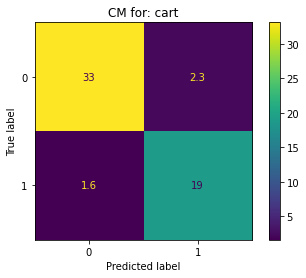

In [11]:
folds = 10
test_indexs = np.random.choice(range(folds), folds, replace=False)
fold_size = int(X.shape[0]/folds)
model_cms = dict()
# models = ['lda', 'qda', 'cart', 'log_reg']
models = ['lda', 'qda', 'cart']
for model in models:
    model_cms[model] = np.zeros((2, 2))

for x in models:
    if x == 'lda':
        model = LinearDiscriminantAnalysis()
    elif x == 'qda':
        model = QuadraticDiscriminantAnalysis()
    elif x == 'cart':
        model = DecisionTreeClassifier()
    elif x == 'log_reg':
        model = LogisticRegression()

    for i in range(folds):
        train_X = deepcopy(X)
        train_y = deepcopy(y)
        index = test_indexs[i]
        test_range = range((index*fold_size),((index+1)*fold_size))
        test_X = X[test_range, :]
        test_y = y[test_range]
        train_X = np.delete(train_X, test_range, axis=0)
        train_y = np.delete(train_y, test_range)
        
        model = model.fit(train_X, train_y)
        prediction = model.predict(test_X)
        model_cms[x] += confusion_matrix(test_y, prediction, labels=model.classes_)


    model_cms[x] /= 10
    acc = accuracy(model_cms[x])
    sens = sensitivity(model_cms[x])
    spec = specificity(model_cms[x])
    prec = precision(model_cms[x])
    rec = recall(model_cms[x])
    f1_score = F_1_score(prec, rec)
    mcc = MCC(model_cms[x])

    print(f'{fold_size=}, {sum(sum(model_cms[x]))=}')
    print(f'for {x=}, acc={acc:.4f}, sens={sens:.4f}, spec={spec:.4f}, prec={prec:.4f}, rec={rec:.4f}, f1_score={f1_score:.4f}, mcc={mcc:.4f}')
    disp = ConfusionMatrixDisplay(confusion_matrix=model_cms[x],
                                display_labels=model.classes_)
    disp.plot()
    plt.title(f'CM for: {x}')
    plt.show()

#print(sum(train_y)/len(train_y))
    



fold_size=56, sum(sum(model_cms[x]))=56.9
for x='lda', acc=0.9613, sens=0.3510, spec=0.9944, prec=0.9897, rec=0.9057, f1_score=0.9458, mcc=0.9180


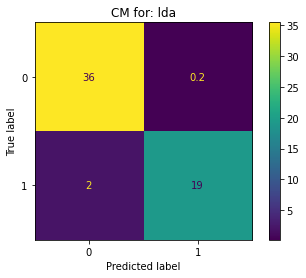

fold_size=56, sum(sum(model_cms[x]))=56.900000000000006
for x='qda', acc=0.9578, sens=0.3670, spec=0.9664, prec=0.9434, rec=0.9434, f1_score=0.9434, mcc=0.9098


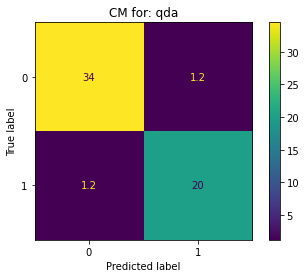

fold_size=56, sum(sum(model_cms[x]))=56.9
for x='cart', acc=0.9350, sens=0.3628, spec=0.9496, prec=0.9147, rec=0.9104, f1_score=0.9125, mcc=0.8608


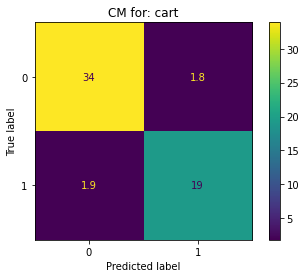

In [12]:
# stratified cv
folds = 10
skf = StratifiedKFold(n_splits=10, shuffle=True)
fold_size = int(X.shape[0]/folds)
model_cms = dict()
# models = ['lda', 'qda', 'cart', 'log_reg']
models = ['lda', 'qda', 'cart']
for model in models:
    model_cms[model] = np.zeros((2, 2))

for x in models:
    if x == 'lda':
        model = LinearDiscriminantAnalysis()
    elif x == 'qda':
        model = QuadraticDiscriminantAnalysis()
    elif x == 'cart':
        model = DecisionTreeClassifier()
    elif x == 'log_reg':
        model = LogisticRegression()

    for train_index, test_index in skf.split(X, y):
        train_X, test_X = X[train_index], X[test_index]
        train_y, test_y = y[train_index], y[test_index]

        
        model = model.fit(train_X, train_y)
        prediction = model.predict(test_X)
        model_cms[x] += confusion_matrix(test_y, prediction, labels=model.classes_)


    model_cms[x] /= 10
    acc = accuracy(model_cms[x])
    sens = sensitivity(model_cms[x])
    spec = specificity(model_cms[x])
    prec = precision(model_cms[x])
    rec = recall(model_cms[x])
    f1_score = F_1_score(prec, rec)
    mcc = MCC(model_cms[x])

    print(f'{fold_size=}, {sum(sum(model_cms[x]))=}')
    print(f'for {x=}, acc={acc:.4f}, sens={sens:.4f}, spec={spec:.4f}, prec={prec:.4f}, rec={rec:.4f}, f1_score={f1_score:.4f}, mcc={mcc:.4f}')
    disp = ConfusionMatrixDisplay(confusion_matrix=model_cms[x],
                               display_labels=model.classes_)
    disp.plot()
    plt.title(f'CM for: {x}')
    plt.show()




THEME: Detecting mislabeled observations

In [13]:
# ps = np.round(np.linspace(0,25,5))/100
# for p in ps:
#     global_test_X = X[0:int(np.floor(0.25*len(X)))]
#     global_test_y = y[0:int(np.floor(0.25*len(X)))]
#     global_train_X = X[int(np.floor(0.25*len(X))):]
#     global_train_y = y[int(np.floor(0.25*len(X))):]
#     miss_label_indices = random.sample(range(0,len(y)), round(0.25*len(y)))
#     for i in miss_label_indices:
#         if y[i] == 0:
#             y[i] = 1
#         else:
#             y[i] = 0

#     folds = 10
#     skf = StratifiedKFold(n_splits=10, shuffle=True)
#     test_indexs = np.random.choice(range(folds), folds, replace=False)
#     fold_size = int(global_train_X.shape[0]/folds)
#     model_cms = dict()
#     # models = ['lda', 'qda', 'cart', 'log_reg']
#     models = ['lda', 'qda', 'cart']
#     models = ['qda']
#     for model in models:
#         model_cms[model] = np.zeros((2, 2))

#     for x in models:
#         if x == 'lda':
#             model = LinearDiscriminantAnalysis()
#         elif x == 'qda':
#             model = QuadraticDiscriminantAnalysis()
#         elif x == 'cart':
#             model = DecisionTreeClassifier()
#         elif x == 'log_reg':
#             model = LogisticRegression()

#         # for i in range(folds):
#         for train_index, test_index in skf.split(global_train_X, global_train_y):
#             train_X, test_X = global_train_X[train_index], global_train_X[test_index]
#             train_y, test_y = global_train_y[train_index], global_train_y[test_index]
            
#             model = model.fit(train_X, train_y)
#             prediction = model.predict(test_X)
#             model_cms[x] += confusion_matrix(test_y, prediction, labels=model.classes_)


#         model_cms[x] /= 10
#         acc = accuracy(model_cms[x])
#         sens = sensitivity(model_cms[x])
#         spec = specificity(model_cms[x])
#         prec = precision(model_cms[x])
#         rec = recall(model_cms[x])
#         f1_score = F_1_score(prec, rec)
#         mcc = MCC(model_cms[x])
#         print(p)
#         print(f'{fold_size=}, {sum(sum(model_cms[x]))=}')
#         print(f'for {x=}, acc={acc:.4f}, sens={sens:.4f}, spec={spec:.4f}, prec={prec:.4f}, rec={rec:.4f}, f1_score={f1_score:.4f}, mcc={mcc:.4f}')




0.0
fold_size=42, sum(sum(model_cms[x]))=42.7
for x='qda', acc=0.6885, sens=0.3571, spec=0.8182, prec=0.7143, rec=0.5357, f1_score=0.6122, mcc=0.3712
0.06
fold_size=42, sum(sum(model_cms[x]))=42.7
for x='qda', acc=0.5831, sens=0.3574, spec=0.7477, prec=0.6224, rec=0.4178, f1_score=0.5000, mcc=0.1753
0.12
fold_size=42, sum(sum(model_cms[x]))=42.7
for x='qda', acc=0.4988, sens=0.4085, spec=0.5727, prec=0.4807, rec=0.4203, f1_score=0.4485, mcc=-0.0071
0.19
fold_size=42, sum(sum(model_cms[x]))=42.7
for x='qda', acc=0.5222, sens=0.2870, spec=0.6974, prec=0.4812, rec=0.3216, f1_score=0.3855, mcc=0.0204
0.25
fold_size=42, sum(sum(model_cms[x]))=42.7
for x='qda', acc=0.4567, sens=0.3231, spec=0.6226, prec=0.4406, rec=0.2930, f1_score=0.3520, mcc=-0.0893


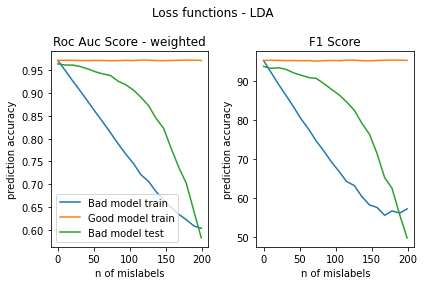

In [22]:
# Antons lösning
model1_roc_scores = []
model2_roc_scores = []
model3_roc_scores = []
model1_f1_scores = []
model2_f1_scores = []
model3_f1_scores = []
ps = np.round(np.linspace(0, int(35*5.69), 20))
n_of_tries = 100
for p in ps:
    model1_roc_score = 0
    model2_roc_score = 0
    model3_roc_score = 0
    model1_f1_score = 0
    model2_f1_score = 0
    model3_f1_score = 0
    model2 = LinearDiscriminantAnalysis()
    model1 = LinearDiscriminantAnalysis()
    for _ in range(n_of_tries):
        cutoff = int(len(y)*0.75)
        X_train, X_test, y_train, y_test = train_test_split(
                X, y, stratify=y, test_size=0.25)

        change_indexes = np.random.choice(cutoff, int(p), replace=False)
        y_train_change = deepcopy(y_train)
        for i in change_indexes:
            y_train_change[i] = (y_train_change[i]+1) % 2
        
        model1.fit(X_train, y_train)
        model2.fit(X_train, y_train_change)
        prediction1 = model1.predict(X_train)
        prediction2 = model2.predict(X_train)
        prediction3 = model2.predict(X_test)

        model1_roc_score += roc_auc_score(prediction1, y_train, average='weighted')
        model2_roc_score += roc_auc_score(prediction2, y_train_change, average='weighted')
        model3_roc_score += roc_auc_score(prediction3, y_test, average='weighted')
        model1_f1_score += f1_score(prediction1, y_train)
        model2_f1_score += f1_score(prediction2, y_train_change)
        model3_f1_score += f1_score(prediction3, y_test)
        
    model1_roc_score /= n_of_tries
    model2_roc_score /= n_of_tries
    model3_roc_score /= n_of_tries
    model1_roc_scores.append(model1_roc_score)
    model2_roc_scores.append(model2_roc_score)
    model3_roc_scores.append(model3_roc_score)
    model1_f1_scores.append(model1_f1_score)
    model2_f1_scores.append(model2_f1_score)
    model3_f1_scores.append(model3_f1_score)


fig , (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Loss functions - LDA')
ax1.plot(ps, model2_roc_scores, label='Bad model train')
ax1.plot(ps, model1_roc_scores, label='Good model train')
ax1.plot(ps, model3_roc_scores, label='Bad model test')
ax1.set_xlabel('n of mislabels')
ax1.set_ylabel('prediction accuracy')
ax1.legend()
ax1.set_title('Roc Auc Score - weighted')
ax2.plot(ps, model2_f1_scores, label='Bad model train')
ax2.plot(ps, model1_f1_scores, label='Good model train')
ax2.plot(ps, model3_f1_scores, label='Bad model test')
ax2.set_xlabel('n of mislabels')
ax2.set_ylabel('prediction accuracy')
ax2.set_title('F1 Score')
plt.tight_layout()
plt.show()

THEME A Part 4

In [18]:
from sklearn.utils import resample
from scipy.sparse import coo_matrix

print(sum(y))
X_sparse = coo_matrix(X)
X_new, X_sparse, y_new = resample(X, X_sparse, y, replace=False, stratify=y)
print(sum(y_new))


212
212
